In [261]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression as lr, Lasso as ls, Ridge as rg, ElasticNet as en, LogisticRegression as loglr
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsRegressor as knr, KNeighborsClassifier as knc
from sklearn.ensemble import RandomForestRegressor as rfr, GradientBoostingRegressor as gbr, RandomForestClassifier as rfc, GradientBoostingClassifier as gbc
from sklearn.preprocessing import Imputer, normalize, StandardScaler, MinMaxScaler, LabelBinarizer, RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.cross_validation import KFold, train_test_split as tts
from catboost import CatBoostRegressor as cbr
from sklearn.tree import DecisionTreeRegressor as dtr, DecisionTreeClassifier as dtc
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer as pst
mms = MinMaxScaler()
rc = RobustScaler()
ss = StandardScaler()

In [378]:
df_train = pd.read_csv('C:/Users/Visha/Downloads/Documents/train.csv', header = 0, index_col = None)
df_train.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.750,NaN,Q


In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.loc[df_train['Fare'] == 0]['Sex'].value_counts()

0    15
Name: Sex, dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [7]:
df_train.describe()

C:\Users\Visha\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#survival data -ve skewed hai kyuki mean(Survived)<median(survived)
#top 25% log ya 1 quartile of the whole ship population hi survive kiya hai
#ship m agar koi lower class tha to wo 50% se bhi zyada of the total ship population m aata tha or  75 percentile m aata tha
#waisehi jo middle class tha wo around top 25% percent space occupy krta tha aur upper class less than 25%

In [9]:
df_train.loc[df_train['Pclass'] == 1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [10]:
#survive krne walon mese 62% log upper class the

In [11]:
df_train.loc[df_train['Sex'] == 1]['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [12]:
#ship m around 35% people were female
#but survive krne walon mese 74% log mada the!!!

In [13]:
df_train.loc[df_train['Sex'] == 0]['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [14]:
#ship m around 64% people were male
#but survive krne walon mese bs 18% log hi male the!!!!

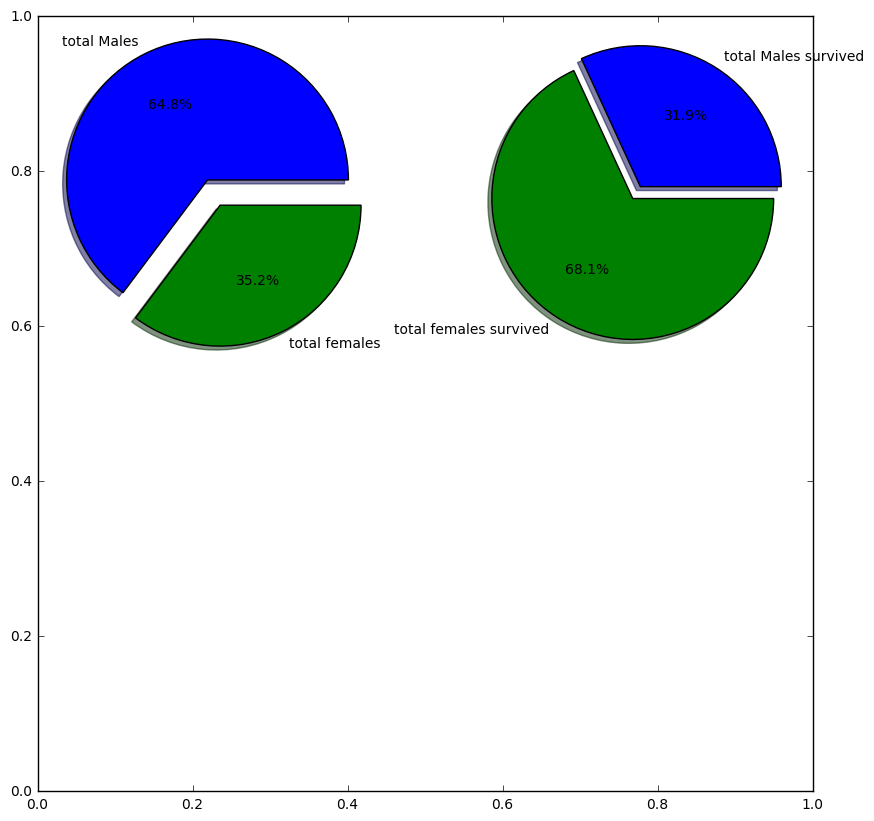

In [19]:
fig, axs = plt.subplots(1, 1, squeeze = 0, figsize = (10,10))
axs1 = fig.add_subplot(221)
axs2 = fig.add_subplot(222)
males = (df_train['Sex'] == 0).sum()
females = (df_train['Sex'] == 1).sum()
proportions1 = [males, females]
males_survived = df_male_survived.shape[0]
females_survived = df_female_survived.shape[0]
proportions2 = [males_survived, females_survived]
axs1.pie(proportions1, labels = ['total Males', 'total females'], autopct = '%1.1f%%', shadow = 1, explode = (.1, .1))
axs2.pie(proportions2, labels = ['total Males survived', 'total females survived'], autopct = '%1.1f%%', shadow = 1, explode = [.05, .05])
plt.show()

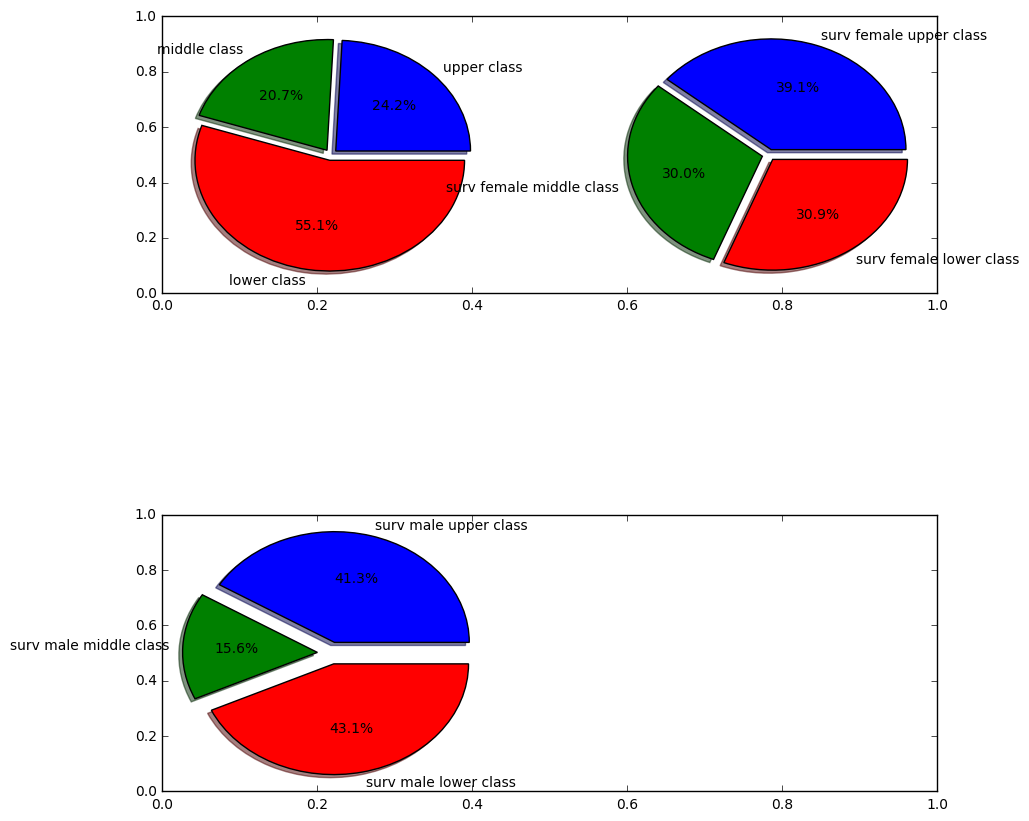

In [20]:
fig, axs = plt.subplots(2, 1, squeeze = 1, figsize = (10,10))
axs1 = fig.add_subplot(221)
axs2 = fig.add_subplot(222)
axs3 = fig.add_subplot(223)
fig.subplots_adjust(hspace = .8, wspace = .3)
upper = (df_train['Pclass'] == 1).value_counts()[1]
middle = (df_train['Pclass'] == 2).value_counts()[1]
lower = (df_train['Pclass'] == 3).value_counts()[1]
proportions1 = [upper, middle, lower]
upper = (df_female_survived['Pclass'] == 1).value_counts()[1]
middle = (df_female_survived['Pclass'] == 2).value_counts()[1]
lower = (df_female_survived['Pclass'] == 3).value_counts()[1]
proportions2 = [upper, middle, lower]
upper = (df_male_survived['Pclass'] == 1).value_counts()[1]
middle = (df_male_survived['Pclass'] == 2).value_counts()[1]
lower = (df_male_survived['Pclass'] == 3).value_counts()[1]
proportions3 = [upper, middle, lower]
axs1.pie(proportions1, labels = ['upper class', 'middle class', 'lower class'], autopct = '%1.1f%%', explode = [.05, .05, .05], shadow = 1)
axs2.pie(proportions2, labels = ['surv female upper class', 'surv female middle class', 'surv female lower class'], autopct = '%1.1f%%', explode = [.05, .05, .05], shadow = 1)
axs3.pie(proportions3, labels = ['surv male upper class', 'surv male middle class', 'surv male lower class'], autopct = '%1.1f%%', explode = [.1, .1, .1], shadow = 1)
plt.show()

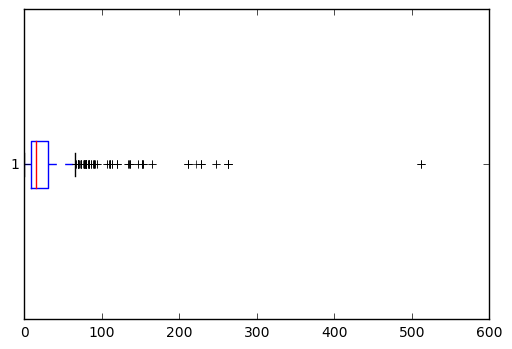

In [21]:
plt.boxplot(df_train.Fare, vert = 0)
plt.show()

#  

#  survived female ka bkc

#  

In [22]:
df_female_survived = df_train.loc[df_train['Sex'] == 1][df_train['Survived'] == 1]

C:\Users\Visha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [23]:
df_female_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",1,55.0,0,0,248706,16.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",1,15.0,0,0,330923,8.0292,NaN,Q


In [24]:
names = []
for i in df_female_survived.iloc[:,3]:
    names.append(i)

In [25]:
tokens = []
for i in names:
    tokens.append(word_tokenize(i))

In [26]:
counts = 0
for i in tokens:
    for j in range(len(i)):
        if i[j] == '(' or i[j] == 'Miss':
            counts += 1

In [27]:
counts

229

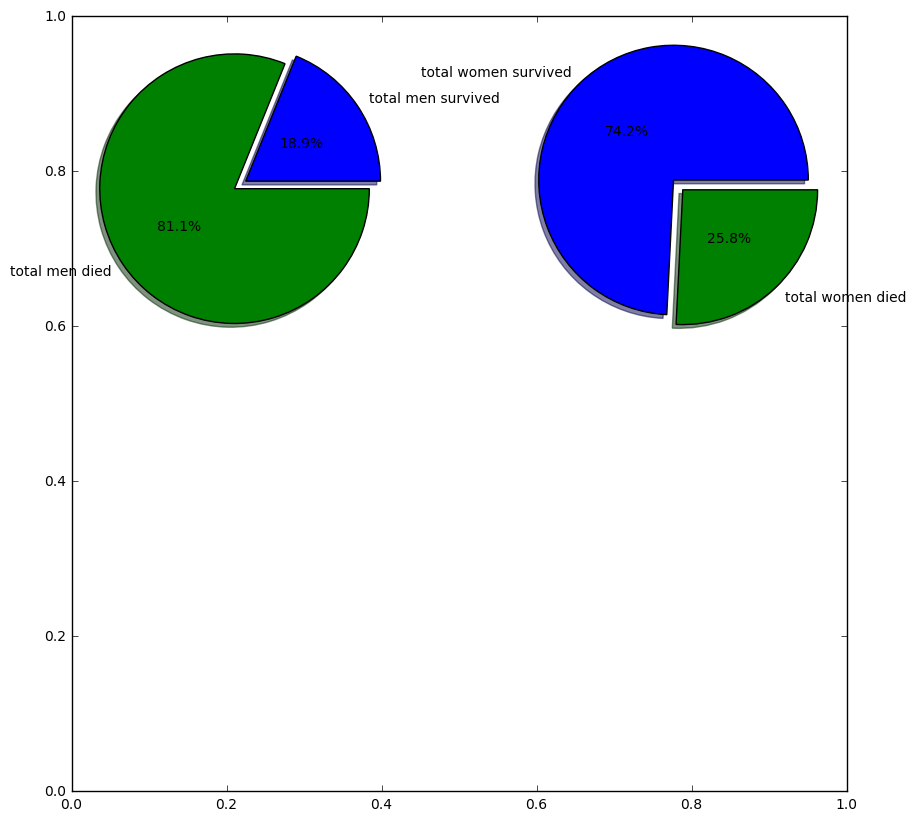

In [28]:
fig, axs = plt.subplots(1, 1, squeeze = 1, figsize = (10,10))
axs1 = fig.add_subplot(221)
axs2 = fig.add_subplot(222)
fig.subplots_adjust(hspace = .3, wspace = .3)
total_men_survived = df_male_survived.shape[0]
total_men_dead = df_train.loc[df_train['Sex'] == 0].shape[0] - total_men_survived
proportions1 = [total_men_survived, total_men_dead]
total_women_survived = df_female_survived.shape[0]
total_women_dead = df_train.loc[df_train['Sex'] == 1].shape[0] - total_women_survived
proportions2 = [total_women_survived, total_women_dead]
axs1.pie(proportions1, labels = ['total men survived', 'total men died'], pctdistance = 0.5, autopct = '%1.1f%%', explode = [.05, .05], shadow = 1)
axs2.pie(proportions2, labels = ['total women survived', 'total women died'], pctdistance = 0.5, autopct = '%1.1f%%', explode = [.05, .05], shadow = 1)
plt.show()

In [29]:
df_female_survived.Age.mean(skipna = 1)

28.84771573604061

In [30]:
df_female_survived.Age.median(skipna = 1)

28.0

In [31]:
df_train.iloc[469,5]

0.75

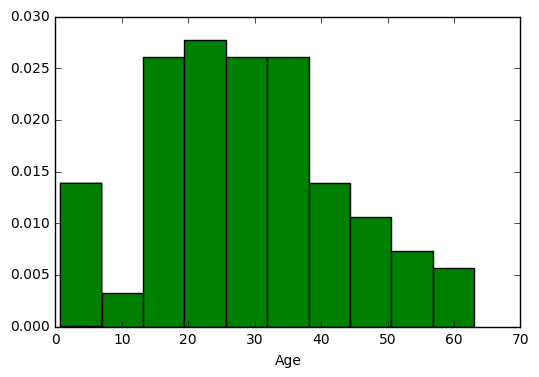

In [32]:
plt.hist(df_female_survived.Age, color = 'green', range = (.75, 63), normed = 1)
plt.xlabel('Age')
plt.show()

#  

#                        survived male ka bkc

#   

In [33]:
df_male_survived = df_train.loc[df_train['Sex'] == 0][df_train['Survived'] == 1]

C:\Users\Visha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [34]:
df_male_survived.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",0,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",0,28.00,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",0,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",0,NaN,1,1,2661,15.2458,NaN,C
74,75,1,3,"Bing, Mr. Lee",0,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",0,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",0,29.00,0,0,345779,9.5000,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.00,0,1,PC 17759,63.3583,D10 D12,C


In [35]:
name = df_male_survived.iloc[:,3]

In [36]:
token = []
for i in name:
    token.append(word_tokenize(i))

In [37]:
flag = 0
for i in token:
    for j in range(len(i)):
        if i[j] == '(':
            flag += 1

In [38]:
flag

9

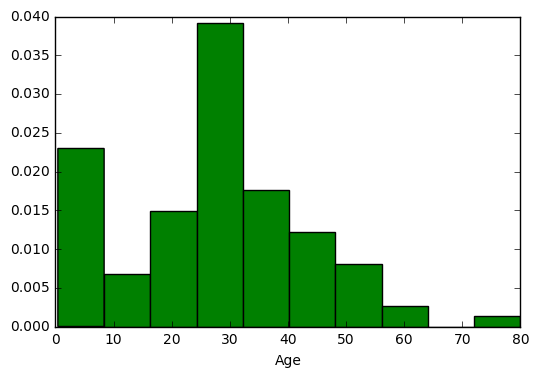

In [39]:
plt.hist(df_male_survived.Age, color = 'green', range = (.419, 80), normed = 1)
plt.xlabel('Age')
plt.show()

In [40]:
df_male_survived.Age.mean()

27.276021505376345

In [41]:
df_male_survived.Age.median()

28.0

#   

# density plots of numeric non NaN variables

#   

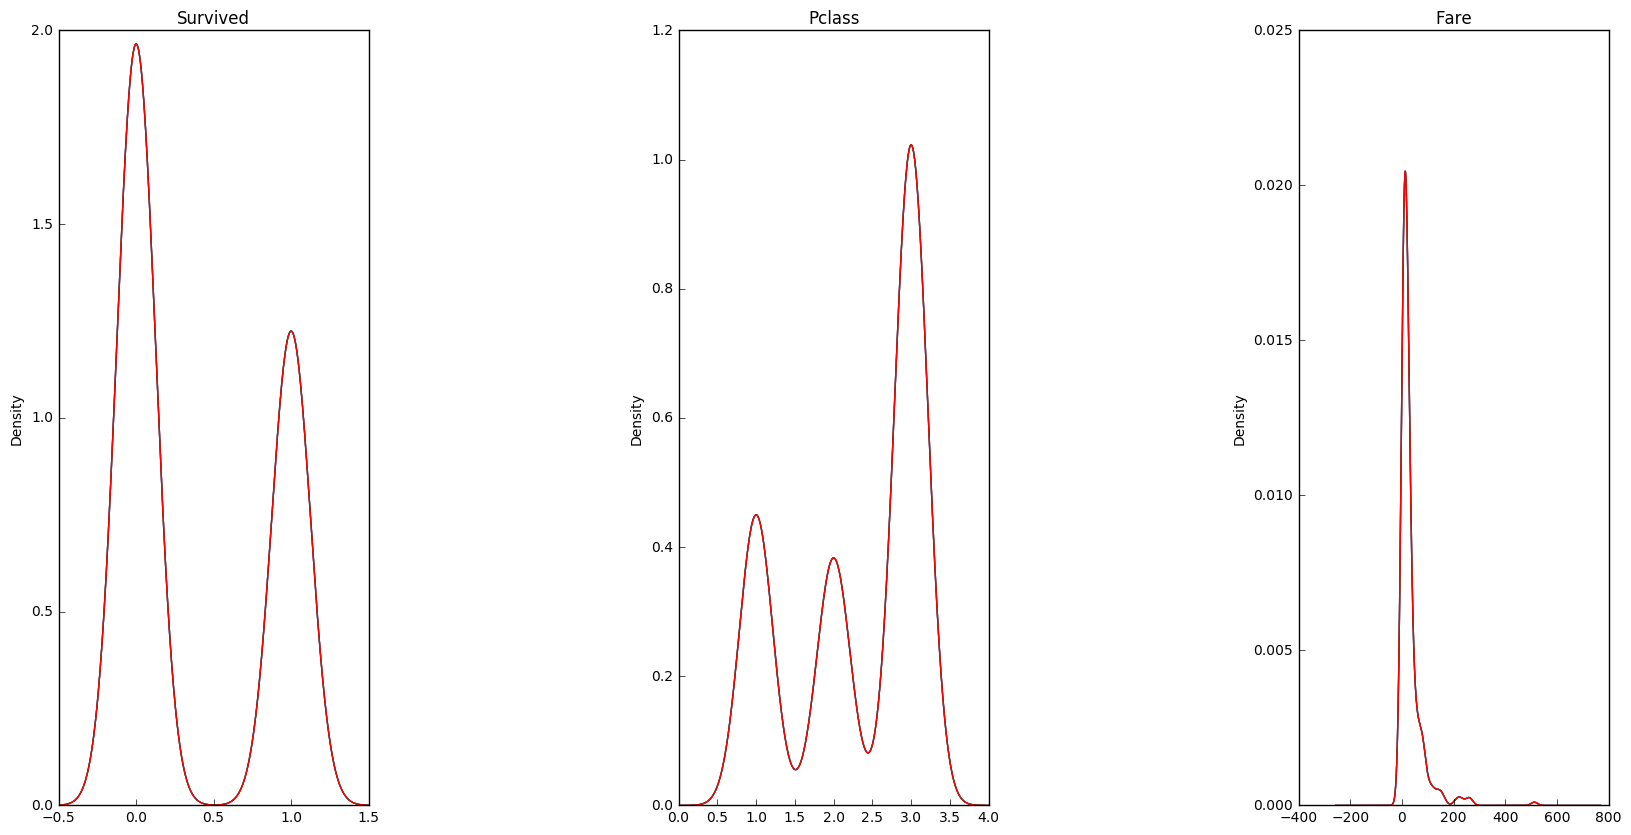

In [42]:
%matplotlib inline
num_df = df_train[['Survived', 'Pclass', 'Fare']]

fig, axs = plt.subplots(1, 3, figsize = (20, 10))

fig.subplots_adjust(hspace=1, wspace=1)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

[None, None, None]

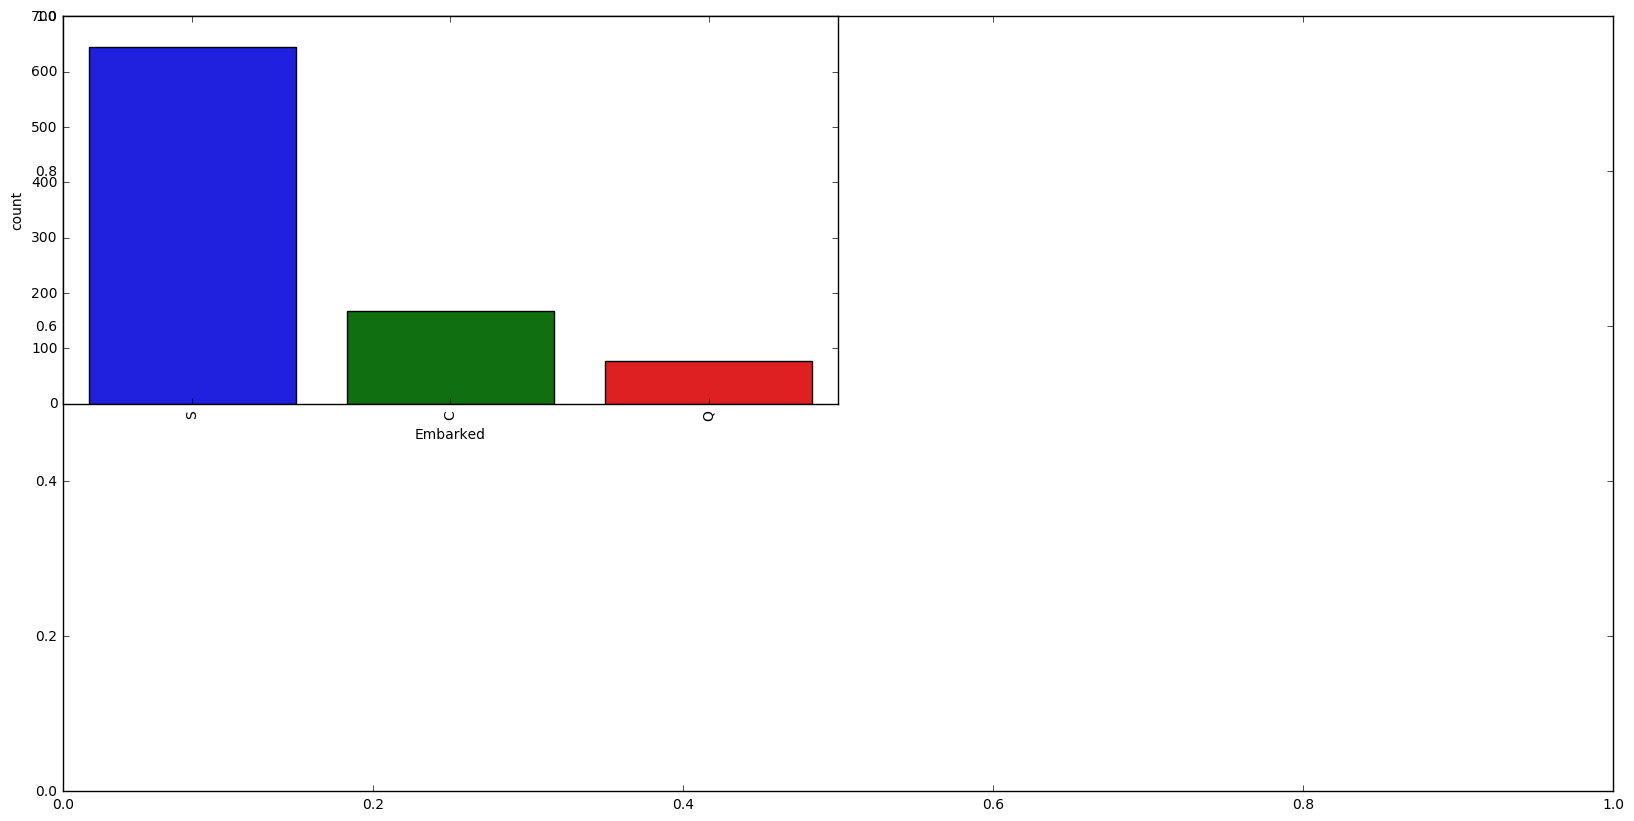

In [43]:
object_features = df_train[['Embarked']]
#object_df = train[object_features]
fig, axs = plt.subplots(1, 1, figsize = (20,10))
axs1 = fig.add_subplot(221)
fig.subplots_adjust(hspace=.001, wspace=.001)
g = sns.countplot(x='Embarked', data=object_features, ax=axs1)
plt.setp(axs1.get_xticklabels(), rotation=90)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [45]:
sp_corr = df_train.corr(method = 'spearman')
sp_corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,-0.042939,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,0.543351,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.135775,-0.361666,-0.043019,-0.022801,-0.688032
Sex,-0.042939,0.543351,-0.135775,1.000000,-0.083330,0.195204,0.254512,0.259593
Age,0.041010,-0.052565,-0.361666,-0.083330,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,0.195204,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,0.254512,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.259593,0.135051,0.447113,0.410074,1.000000


In [46]:
sp_corr.iloc[0,0]

1.0

In [47]:
pear_corr = df_train.corr()

In [48]:
sp_corr_age = sp_corr.iloc[3,:]
sp_corr_age

PassengerId   -0.042939
Survived       0.543351
Pclass        -0.135775
Sex            1.000000
Age           -0.083330
SibSp          0.195204
Parch          0.254512
Fare           0.259593
Name: Sex, dtype: float64

In [52]:
df_y = pd.DataFrame(y_missing_age, y_missing_age.index, columns = ['Age'])

In [53]:
df_y.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [54]:
y_missing_age = df_train['Age'].dropna()
y_missing_age.head(6)
y_missing_age.reset_index(drop = 1, inplace = 1)

In [55]:
df_new = pd.DataFrame(data = x_age_related.Fare, index = y_missing_age.index, columns = ['Fare'])

In [56]:
df_new_1 = pd.DataFrame(data = x_age_related.Survived, index = y_missing_age.index, columns = ['Survived'])

In [57]:
df_new.reset_index(drop = 1)

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
5,8.4583
6,51.8625
7,21.0750
8,11.1333
9,30.0708


In [58]:
df_new_1.reset_index(drop = 1)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [59]:
df_x = pd.DataFrame.join(df_new, df_new_1)

In [60]:
x_age_related = df_train[['Fare', 'Survived']]

In [61]:
df_x.reset_index(drop = 1, inplace = 1)
df_x.head()

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0


In [62]:
df_x_train, df_x_test, df_y_train, df_y_test = tts(df_x, df_y, test_size = .30, random_state = 1)

In [63]:
clf1 = lr(n_jobs = -1)

In [64]:
clf2 = rg(random_state = 1, solver = 'lsqr')

In [65]:
clf3 = ls(random_state = 1, selection = 'random')

In [66]:
clf4 = en(alpha = 1, l1_ratio = 1, random_state = 1, selection = 'random')

In [67]:
clf1.fit(df_x_train, df_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [68]:
df_y_test.shape[0]

215

In [69]:
df_x_test.iloc[0,:].reshape(1,-1)

array([[ 26.,   1.]])

In [70]:
for i in range(df_x_test.shape[0]):
        print(np.round(clf1.predict(df_x_test.iloc[i,:].reshape(1,-1))), end = "")
        print(" -> ", end = "")
        print(df_y_test.iloc[i])

[[ 29.]] -> Age    15.0
Name: 546, dtype: float64
[[ 30.]] -> Age    7.0
Name: 223, dtype: float64
[[ 30.]] -> Age    33.0
Name: 403, dtype: float64
[[ 29.]] -> Age    14.0
Name: 8, dtype: float64
[[ 29.]] -> Age    21.0
Name: 394, dtype: float64
[[ 30.]] -> Age    42.0
Name: 120, dtype: float64
[[ 29.]] -> Age    23.0
Name: 377, dtype: float64
[[ 30.]] -> Age    56.0
Name: 373, dtype: float64
[[ 29.]] -> Age    39.0
Name: 632, dtype: float64
[[ 29.]] -> Age    24.0
Name: 690, dtype: float64
[[ 29.]] -> Age    27.0
Name: 438, dtype: float64
[[ 30.]] -> Age    22.0
Name: 181, dtype: float64
[[ 29.]] -> Age    45.5
Name: 161, dtype: float64
[[ 30.]] -> Age    52.0
Name: 567, dtype: float64
[[ 29.]] -> Age    33.0
Name: 599, dtype: float64
[[ 30.]] -> Age    3.0
Name: 280, dtype: float64
[[ 29.]] -> Age    26.0
Name: 56, dtype: float64
[[ 29.]] -> Age    22.0
Name: 257, dtype: float64
[[ 29.]] -> Age    31.0
Name: 591, dtype: float64
[[ 30.]] -> Age    47.0
Name: 698, dtype: float64
[[ 30

In [71]:
clf2.fit(df_x_train, df_y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='lsqr', tol=0.001)

In [72]:
for i in range(df_x_test.shape[0]):
        print(np.round(clf2.predict(df_x_test.iloc[i,:].reshape(1,-1))), end = "")
        print(" -> ", end = "")
        print(df_y_test.iloc[i])

[[ 30.]] -> Age    15.0
Name: 546, dtype: float64
[[ 30.]] -> Age    7.0
Name: 223, dtype: float64
[[ 30.]] -> Age    33.0
Name: 403, dtype: float64
[[ 30.]] -> Age    14.0
Name: 8, dtype: float64
[[ 30.]] -> Age    21.0
Name: 394, dtype: float64
[[ 30.]] -> Age    42.0
Name: 120, dtype: float64
[[ 29.]] -> Age    23.0
Name: 377, dtype: float64
[[ 29.]] -> Age    56.0
Name: 373, dtype: float64
[[ 30.]] -> Age    39.0
Name: 632, dtype: float64
[[ 30.]] -> Age    24.0
Name: 690, dtype: float64
[[ 28.]] -> Age    27.0
Name: 438, dtype: float64
[[ 30.]] -> Age    22.0
Name: 181, dtype: float64
[[ 30.]] -> Age    45.5
Name: 161, dtype: float64
[[ 30.]] -> Age    52.0
Name: 567, dtype: float64
[[ 30.]] -> Age    33.0
Name: 599, dtype: float64
[[ 30.]] -> Age    3.0
Name: 280, dtype: float64
[[ 30.]] -> Age    26.0
Name: 56, dtype: float64
[[ 29.]] -> Age    22.0
Name: 257, dtype: float64
[[ 30.]] -> Age    31.0
Name: 591, dtype: float64
[[ 29.]] -> Age    47.0
Name: 698, dtype: float64
[[ 30

In [73]:
metrics.mean_squared_log_error(df_y_test, abs(clf1.predict(df_x_test)))

0.51055896196393857

In [74]:
metrics.mean_squared_log_error(df_y_test, abs(clf2.predict(df_x_test)))

0.507754180026465

In [75]:
clf3.fit(df_x_train, df_y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='random', tol=0.0001, warm_start=False)

In [76]:
metrics.mean_squared_log_error(df_y_test, abs(clf3.predict(df_x_test)))

0.50778870394938225

In [77]:
clf4.fit(df_x_train, df_y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='random', tol=0.0001, warm_start=False)

In [78]:
metrics.mean_squared_log_error(df_y_test, abs(clf4.predict(df_x_test)))

0.50778870394938225

In [107]:
clf5 = knr(n_neighbors = 5, weights = 'distance', algorithm = 'brute')

In [108]:
clf5.fit(df_x_train, df_y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [109]:
metrics.mean_squared_log_error(df_y_test, abs(clf5.predict(df_x_test)))

0.65240105485399735

In [120]:
clf6 = dtr(splitter = 'random', random_state = 1, max_features = 'auto')

In [123]:
clf6.fit(df_x_train, df_y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random')

In [124]:
metrics.mean_squared_log_error(df_y_test, abs(clf6.predict(df_x_test)))

0.72064520262453169

In [150]:
clf7 = rfr(n_estimators = 10, max_features = .3, random_state = 1)

In [151]:
clf7.fit(df_x_train, df_y_train)

C:\Users\Visha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [152]:
metrics.mean_squared_log_error(df_y_test, abs(clf7.predict(df_x_test)))

0.57198123178073979

In [178]:
clf8 = gbr(loss = 'quantile', random_state = 1)

In [179]:
clf8.fit(df_x_train, df_y_train)

C:\Users\Visha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [180]:
metrics.mean_squared_log_error(df_y_test, abs(clf8.predict(df_x_test)))

0.90344915059796338

In [183]:
df_train.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [200]:
df_train['Age'].iloc[0]

22.0

In [203]:
index_to_change = []
for i in df_train.Age.index:
     if df_train.Age.iloc[i] == 'nan':
            index_to_change.append(i)

In [204]:
index_to_change

[]

In [207]:
df_train.corr(method = 'spearman')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,-0.042939,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,0.543351,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.135775,-0.361666,-0.043019,-0.022801,-0.688032
Sex,-0.042939,0.543351,-0.135775,1.000000,-0.083330,0.195204,0.254512,0.259593
Age,0.041010,-0.052565,-0.361666,-0.083330,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,0.195204,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,0.254512,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.259593,0.135051,0.447113,0.410074,1.000000


In [379]:
X = df_train[['Fare', 'Sex', 'Parch']]
y = df_train.Survived

In [380]:
X.shape[0]

891

In [381]:
for i in range(X.shape[0]):
    if X.iloc[i,1] == 0:
        X.iloc[i,1] = 'Male'
    else:
        X.iloc[i,1] = 'Female'

C:\Users\Visha\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [382]:
X.tail()

,Fare,Sex,Parch
886,13.00,Male,0
887,30.00,Female,0
888,23.45,Female,2
889,30.00,Male,0
890,7.75,Male,0


In [299]:
mms.fit_transform(X)

array([[ 0.01415106,  0.        ],
       [ 0.13913574,  1.        ],
       [ 0.01546857,  1.        ],
       ..., 
       [ 0.04577135,  1.        ],
       [ 0.0585561 ,  0.        ],
       [ 0.01512699,  0.        ]])

In [318]:
X_train, X_test, y_train, y_test = tts(mms.fit_transform(X), y, test_size = .25, random_state = 1)

In [319]:
clf = svm.SVC(C = 1, kernel = 'rbf', degree = 2,)

In [320]:
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [321]:
clf.score(X_test, y_test)

0.7847533632286996

In [322]:
clf9 = loglr(penalty = 'l2', solver = 'liblinear', n_jobs = -1, max_iter = 100000)

In [323]:
clf9.fit(X_train, y_train)

C:\Users\Visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=-1, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [376]:
clf9.score(X_test, y_test)

0.78923766816143492

In [340]:
clf10 = knc(n_neighbors = 5, algorithm = 'brute', weights = 'distance')

In [341]:
clf10.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [375]:
clf10.score(X_test, y_test)

0.82959641255605376

In [357]:
clf11 = dtc(splitter = 'random', max_features = 'auto')

In [358]:
clf11.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [359]:
clf11.score(X_test, y_test)

0.83856502242152464

In [369]:
clf12 = gbc(loss = 'exponential', max_features = 'auto')

In [370]:
clf12.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [377]:
clf.score(X_test, y_test)

0.7847533632286996

In [ ]:
clf13 = 